In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.describe(include="object").T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


### Iniciar Analise exploratoria dos dados

In [8]:
print(df.sex.value_counts())
print()
print(df.smoker.value_counts())
print()
print(df.region.value_counts())
print()

sex
male      676
female    662
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



### Sera feita um padronizacao dos dados para tipos numericos

In [9]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

In [10]:
labelEncoder.fit(df.sex.drop_duplicates())
df.sex = labelEncoder.transform(df.sex)
print("Sex mapping:")
print(f"0 = {labelEncoder.inverse_transform([0])[0]}")
print(f"1 = {labelEncoder.inverse_transform([1])[0]}")

Sex mapping:
0 = female
1 = male


In [11]:
labelEncoder.fit(df.smoker.drop_duplicates())
df.smoker = labelEncoder.transform(df.smoker)
print("\nSmoker mapping:")
print(f"0 = {labelEncoder.inverse_transform([0])[0]}")
print(f"1 = {labelEncoder.inverse_transform([1])[0]}")


Smoker mapping:
0 = no
1 = yes


In [12]:
labelEncoder.fit(df.region.drop_duplicates())
df.region = labelEncoder.transform(df.region)
print("\nRegion mapping:")
for i in range(4):
    print(f"{i} = {labelEncoder.inverse_transform([i])[0]}")


Region mapping:
0 = northeast
1 = northwest
2 = southeast
3 = southwest


In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Agora que os dados estao categorizados em dados numericos, como na coluna de smoker ( 0 = No, 1 = Yes ), iremos fazer a analise da correlacao

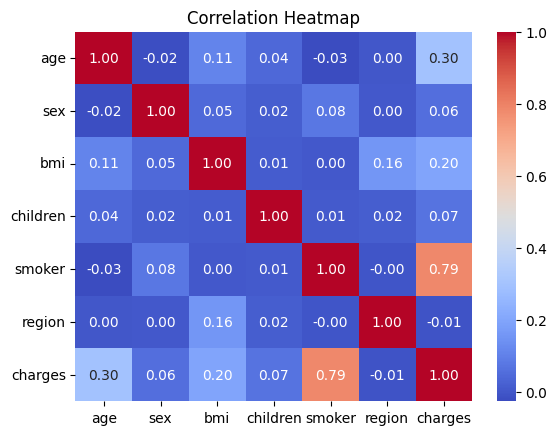

In [14]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Apos analisar a correlacao dos dados
#### Pode se concluir que a coluna smoker tem uma correlacao maior com a coluna charges, vamos explorar isso mais a frente

In [15]:
# noinspection LanguageDetectionInspection
for col in df.columns:
    fig = go.Figure()

    for i, (category, count) in enumerate(df[col].value_counts().items()):
        fig.add_trace(go.Bar(x=[col], y=[count], name=category))
    fig.update_layout(title=f'Distribution of {col}', xaxis_title=col, yaxis_title='Count')
    fig.show()

### Para iniciar a analise dos dados o primeiro passo e questionar, fazer perguntas para os dados

#### Qual regiao possui a maior quantidade de fumantes?

In [16]:
px.histogram(
    data_frame=df,
    x='region',
    color='smoker',
    title='Distribuição de Fumantes por Região',
    color_discrete_sequence=['blue', 'red']
)

##### No dicionario de regioes a que possui mais pacientes fumantes e 2, southeast

#### Qual a distribuicao de fumantes pelo custo?

In [17]:
px.histogram(
    data_frame=df[df.smoker == 1],
    x="charges",
    nbins=50,
    title="Distribuiçao de custo para fumantes"
)

In [18]:
px.histogram(
    data_frame=df[df.smoker == 0],
    x="charges",
    nbins=50,
    title="Distribuiçao de custo para não fumantes"
)

##### Apos analisar essa distribuicao de custo de fumantes e nao fumantes, consegue concluir que os pacientes que fumam pagam em maioria mais que 20 mil, e para os pacientes nao fumantes pagam menos de 15 mil

#### Qual genero 'sex' fumam mais?

In [19]:
px.histogram(
  data_frame=df,
  x='smoker',
  color='sex',
  barmode='group',
  color_discrete_sequence=['red', 'blue'],
  title='Distribuiçao de fumantes por genero'
)

#### Olhando esse grafico existem muito mais nao fumantes que fumantes, porem dos fumantes a maioria sao de homens

### Qual genero paga mais de plano de saude ?

In [20]:
px.box(
    data_frame=df,
    x='sex',
    y='charges',
    color='smoker',
    title='Distribuiçao de custo por genero'
)

#### Os homens e mulheres que fumam (caixas azuis) tem um volume muito maior de gasto com o plano de saude, mesmo os generos que nao fumam, possuem alguns outliers que acabam pagam valores altos tambem. Por que sera?

### Quero entender por que dos nao fumantes pagam muito, vamos analisar em relacao ao seu imc

In [21]:
px.scatter(
    data_frame=df[df.smoker == 0],
    x='bmi',
    y='charges',
    title='IMC vs Custo para nao fumantes',
    trendline='ols'
)

#### Pode se analisar que em media os nao fumantes pagam menos de 15 mil independente do seu imc, porem alguns que possuem um imc entre 20 e 40 estao fora da media pagando mais q 15 mil

### Agora em relacao as idades desses pacientes

In [22]:
px.box(
    df[df.smoker == 0],
    x='age',
    y='bmi',
    title='Distribuicao do imc por idade para nao fumantes'
)

In [23]:
px.box(
    df[df.smoker == 1],
    x='age',
    y='bmi',
    title='Distribuicao do imc por idade para fumantes'
)

#### Apos visualizar esses dados os imcs sao bem distribuidas em relacao as idades, porem preocupante tendo muitos pacientes com imc muito altos podendo significar obesidades,..., os dados nao possui muito outliers

### Qual a relacao das idades, genero e que fumam?

In [24]:
px.bar(
    data_frame=df,
    x="age",
    y="smoker",
    color="sex",
    title="Relacao entre idade, fumante e genero"
)

#### Mais uma visualizacao que comprova os homens de todas idades acabam fumando mais que as mulheres

### Sera que homens que fumam pagam um valor maior de plano de saude?

In [25]:
df_smokers = df[df.smoker == 1]
df_smokers = df_smokers.groupby(['age']).agg({'charges': 'mean'}).reset_index()

fig = px.line(
    data_frame=df_smokers,
    x='age',
    y='charges',
    title='Custo médio para fumantes por idade',
    labels={'charges': 'Custo médio', 'age': 'Idade'}
)
fig.update_traces(mode='lines+markers')
fig.show()

#### Em todas as idades os que fumam estao pagando mais que 25 mil

In [26]:
df_smokers = df[df["smoker"] == 1]

fig = px.histogram(
    df_smokers,
    x="age",
    y="charges",
    nbins=30,
    title="Contagem de fumantes por idade",
    color_discrete_sequence=["crimson"]
)
fig.update_layout(
    xaxis_title="Idade",
    yaxis_title="Soma de custos"
)
fig.show()

### Pode se concluir que existem muitos fumantes entre 18 e 20 anos que estao pagando valores altos de plano de saude, vamo analisar isso.

In [27]:
smokers = df[(df.age >= 18) & (df.age <= 20)]

fig = px.histogram(
    data_frame=smokers,
    x="smoker",
    color="sex",
    barmode="group",
    title="O numero de fumantes entre 18 e 20 anos",
    color_discrete_sequence=["red", "blue"]
)
fig.update_xaxes(
    tickvals=[0, 1],
    ticktext=["Não Fumante", "Fumante"]
)
fig.update_layout(
    xaxis_title="Fumante",
    yaxis_title="Quantidade"
)
fig.show()

### Quanto esses jovens pagam de plano de saude?

In [28]:
fig = px.box(
    data_frame=smokers,
    x="charges",
    y="smoker",
    orientation="h",
    color="smoker",
    title="Box para visualizar o valor pago pelos jovens"
)

fig.update_yaxes(
    tickvals=[0, 1],
    ticktext=["Não Fumantes", "Fumantes"],
    title="Fumantes"
)
fig.update_layout(
    xaxis_title="Custo",
    showlegend=False
)
fig.show()

#### Mais uma vez os fumantes sendo comprovados que pagam muito mais que os nao fumantes

### Agora qual a relacao entre os nao fumantes e o custo?

In [29]:
df_n_smokers = df[df.smoker == 0]

fig = px.density_contour(
    df_n_smokers,
    x="age",
    y="charges",
    color_discrete_sequence=["magenta"]
)

fig.add_trace(go.Scatter(
    x=df_n_smokers.age,
    y=df_n_smokers.charges,
    mode='markers',
    marker=dict(color='white', symbol='cross', size=6, line=dict(width=1, color='black')),
    showlegend=False
))

fig.update_layout(
    title="Distribuico de custo pelos nao fumantes",
    xaxis_title="Idade",
    yaxis_title="Custo"
)

fig.show()

#### Gosegue-se ver que ixiste um reta, com poucos paciente pagando mais que a maioria

### E os fumantes?

In [30]:
df_smokers = df[df.smoker == 1]

fig = px.density_contour(
    df_smokers,
    x="age",
    y="charges",
    color_discrete_sequence=["magenta"]
)

fig.add_trace(go.Scatter(
    x=df_smokers.age,
    y=df_smokers.charges,
    mode='markers',
    marker=dict(color='white', symbol='cross', size=6, line=dict(width=1, color='black')),
    showlegend=False
))

fig.update_layout(
    title="Custo por fumantes",
    xaxis_title="Idade",
    yaxis_title="Custo"
)

fig.show()

#### Se analisa que existem duas grandes aglomeracoes de custo bem altas e bem dispersas para os fumantes

### Concluise que os fumantes pagam acima de 10 mil e nao fumantes a media e entre 10 e 5 mil

### Vendo que existe uma normalidade para nao fumantes, gradativamente com a idade, porem alguns pagam mais por motivos algum outro motivo

### Vamos analisar a relacao com os IMCs

In [31]:
fig = px.histogram(
    df,
    x="bmi",
    nbins=40,
    title="Distribuição geral do BMI",
    color_discrete_sequence=["teal"]
)
fig.update_layout(xaxis_title="BMI", yaxis_title="Número de pacientes")
fig.show()


#### Existe um desvio padrao para para os imcs entre 20 e 40 a maioria esta localizada entre esses valores

### Vamos explorar mais o IMC, qual e a distribuicao do imc para o custo

In [32]:
px.histogram(
    df,
    x="bmi",
    y="charges",
    nbins=40,
    title="Distribuicao de custo para pacientes com imc"
)

#### O valor mantem, os pacientes entre os 25 e 40 imc pagam quase todo a quantia total, somando tudo, sendo a maioria

In [33]:
bmi_df = df[(df.bmi >= 20) & (df.bmi <= 40)]

fig = px.histogram(
    bmi_df,
    x="charges",
    nbins=40,
    title="Distribuicao de custo para pacientes com imc entre 20 e 40"
)

fig.show()

#### Analisando o resultado, a quantidade e mt grande, pois e onde esta a maioria dos pacientes, nao querendo dizer que sao os que pagam os maiores valores.

### Agora se o paciente fuma, sera q impacta no seu imc

In [34]:
fig = px.scatter(
    df,
    x="bmi",
    y="charges",
    color="smoker",
    title="Relação entre imc e custo",
    color_discrete_sequence=["blue", "red"]
)
fig.update_layout(xaxis_title="IMC", yaxis_title="Custo")
fig.show()

#### Analisando esse rsultado se conclui que a maioria dos pacientes que fumam, estao entre os imcs de 30 e 40 e estao pagando os maiores valores em relacao aos outros pacientes que nao fumam e estao no mesmo aglomerado de imcs

### Agora vamos analisar as proporcoes de filhos, sera tem algum impacto em algum nivel

In [35]:
fig = px.histogram(
    df,
    x="children",
    nbins=len(df["children"].unique()),
    title="Distribuição do número de filhos",
    color_discrete_sequence=["mediumvioletred"]
)
fig.update_layout(
    xaxis_title="Número de filhos",
    yaxis_title="Número de pacientes"
)
fig.show()

#### A grande parte, para ser mais exato 574 dos pacientes nao possuem filhos, porem a distribuicao para 1, 2 e 3 filhos e bem grande

### E sera que a quantidade de filhos impacta no custo?

In [36]:
fig = px.box(
    df,
    x="children",
    y="charges",
    title="Distribuição de custo por número de filhos",
    color="children",
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig.update_layout(
    xaxis_title="Número de filhos",
    yaxis_title="Custo"
)
fig.show()


#### Boa parte dos pacientes nao possuem filhos, estao pagando mais caro. Por quê?

### Sera que quem nao tem filhos tende a fumar mais, valor analisado que impacta muito no custo do plano de saude

In [37]:
fig = px.histogram(
    df,
    x="children",
    color="smoker",
    barmode="group",
    title="Distribuição de fumantes por número de filhos",
    color_discrete_sequence=["blue", "red"]
)
fig.update_layout(
    xaxis_title="Número de filhos",
    yaxis_title="Contagem de pacientes",
    legend_title="Fumante (0 = Não, 1 = Sim)"
)
fig.show()

#### A maioria nao fuma mas maior parte dos fumantes sao quem nao tem filhos

### Agora sera que eles tambem tendem a ter um imc maior?

In [38]:
fig = px.histogram(
    df[df["children"] == 0],
    x="bmi",
    nbins=30,
    title="Distribuição de IMC para pacientes sem filhos",
    color_discrete_sequence=["darkorange"]
)

fig.update_layout(
    xaxis_title="IMC",
    yaxis_title="Número de pacientes"
)
fig.show()


### Qual seria o valor pago por esses pacientes que nao tem filhos e fumam?

In [39]:
fig = px.box(
    df,
    x="children",
    y="charges",
    color="smoker",
    title="Custo por número de filhos (Fumantes vs Não Fumantes)",
    color_discrete_sequence=["blue", "red"]
)
fig.update_layout(
    xaxis_title="Número de filhos",
    yaxis_title="Custo",
    legend_title="Fumante (0 = Não, 1 = Sim)"
)
fig.show()


#### Dos pacientes que fumam e nao tem filhos estao pagando mairoes valores que a maioria que nao fumam, uma relacao de impacto para o custo

### Um padrao pode ser analisado, paciente que fuma independente se tem filhos ou nao, acaba pagando mais que que nao fuma

### Com todos os esses pontos analisador, ja se pode comecar o treinamento, apos entender os dados, entender aa distribuicao, o que influencia o que, concluido que o que mais influencia para um maior custo e o paciente fumar e ter um imc mais elevado, as vezes determinando uma obesidade, que e uma doenca serissima que precisa ser tratada com urgencia.

### Passo de seguir com a separacao dos dados de treinamento e de teste

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error
)
import numpy as np

In [41]:
X = df.drop('charges', axis=1)
y = df.charges

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Antes de comecar o treinamento iremos padronizar os dados para o modelo nao estranhar a estrutura dos dados

In [43]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
import statsmodels.api as sm

# Adiciona constante para o modelo
X_train_sm = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Exibe o resumo com p-values e intervalos de confiança
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     508.7
Date:                Mon, 19 May 2025   Prob (F-statistic):          2.71e-308
Time:                        20:40:23   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1063   BIC:                         2.174e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.335e+04    187.273     71.265      0.0

Agora usaremos o modelo de regressao linear multipla, pois existem varias variaveis que influenciam no calcular do modelo

In [44]:
linearRModel = LinearRegression()
linearRModel.fit(X_train_scaled, y_train)

LinearRegression()

In [45]:
y_pred = linearRModel.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [46]:
print(f"R² Score: {r2:.4f}")
print(f"MAE (Erro absoluto médio): {mae:.2f}")
print(f"MSE (Erro quadrático médio): {mse:.2f}")
print(f"RMSE (Raiz do erro quadrático médio): {rmse:.2f}")

R² Score: 0.7833
MAE (Erro absoluto médio): 4186.51
MSE (Erro quadrático médio): 33635210.43
RMSE (Raiz do erro quadrático médio): 5799.59


Podemos analisar que o modelo nao foi tao satisfatorio, por isso iremos testar com outro modelo para comparar o desempenho com a base de dados

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    random_state=0,
    oob_score=True
)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [49]:
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

oob_score = rf.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

print(f"Random Forest:")
print(f"R² Score: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")

Out-of-Bag Score: 0.8520270588686181
Random Forest:
R² Score: 0.8729
MAE: 2557.91
MSE: 19733647.05
RMSE: 4442.26


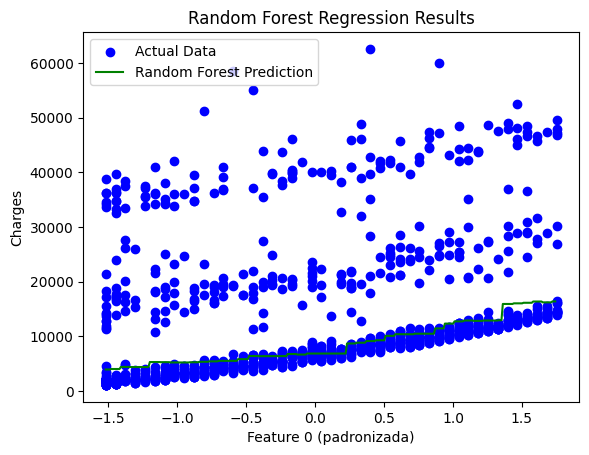

In [50]:
import numpy as np

# Gere X_grid com 6 features (igual ao número de colunas de X_train_scaled)
X_grid = np.arange(min(X_train_scaled[:, 0]), max(X_train_scaled[:, 0]), 0.01).reshape(-1, 1)
X_grid = np.hstack((X_grid, np.zeros((X_grid.shape[0], X_train_scaled.shape[1] - 1))))

plt.scatter(X_train_scaled[:, 0], y_train, color='blue', label="Actual Data")
plt.plot(X_grid[:, 0], rf.predict(X_grid), color='green', label="Random Forest Prediction")
plt.title("Random Forest Regression Results")
plt.xlabel('Feature 0 (padronizada)')
plt.ylabel('Charges')
plt.legend()
plt.show()

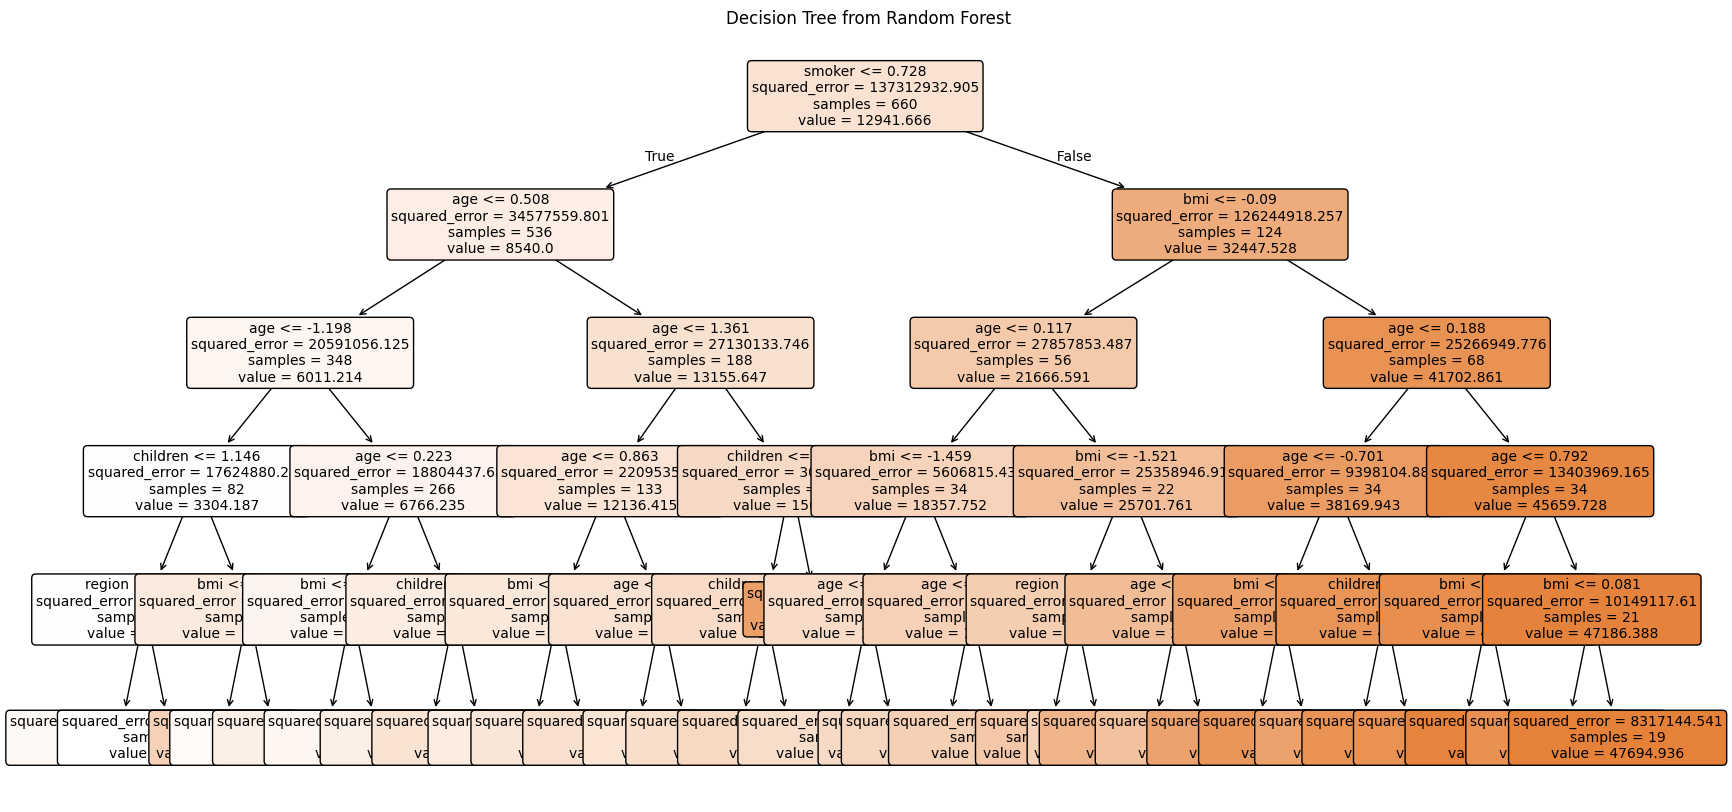

In [51]:
from sklearn.tree import plot_tree

tree_to_plot = rf.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

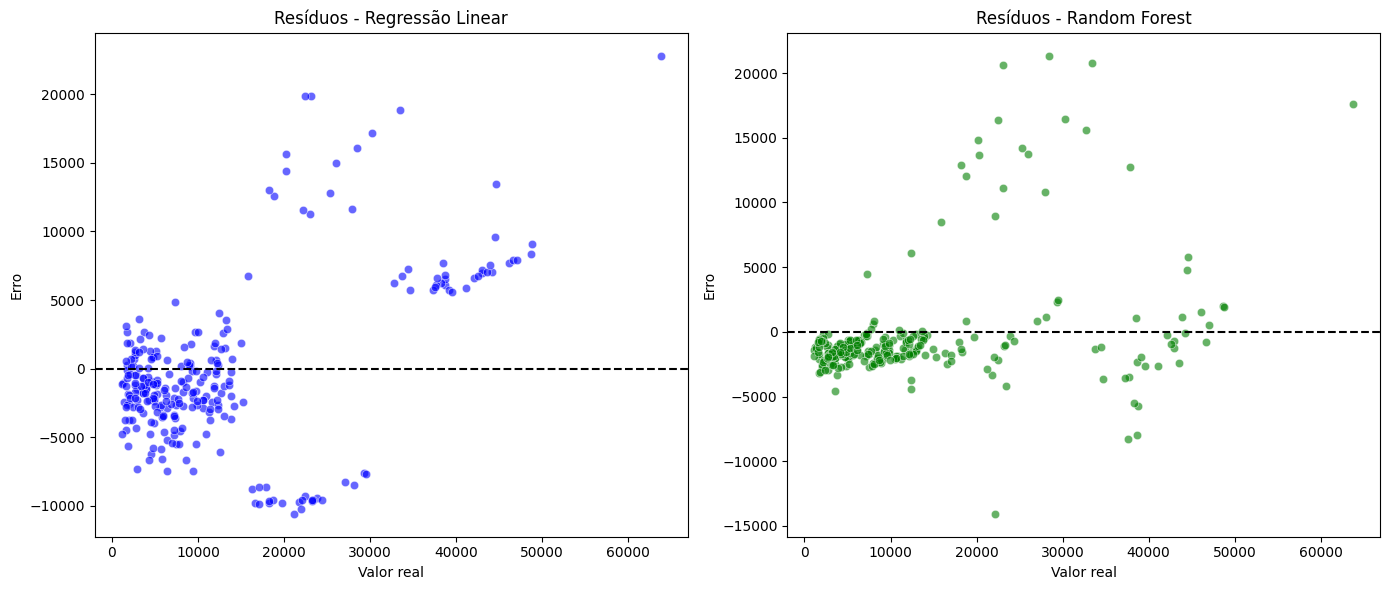

In [52]:
residuals_lr = y_test - y_pred
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=residuals_lr, color="blue", alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title("Resíduos - Regressão Linear")
plt.xlabel("Valor real")
plt.ylabel("Erro")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=residuals_rf, color="green", alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title("Resíduos - Random Forest")
plt.xlabel("Valor real")
plt.ylabel("Erro")

plt.tight_layout()
plt.show()

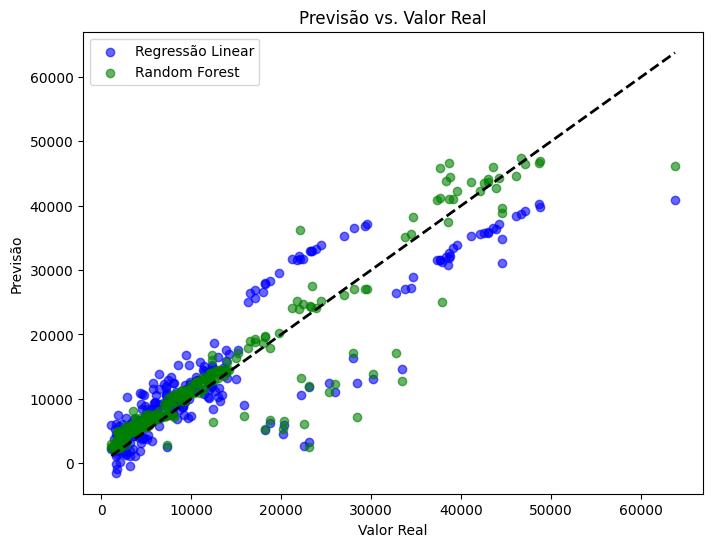

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Regressão Linear')
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Previsão')
plt.title('Previsão vs. Valor Real')
plt.legend()
plt.show()

In [53]:
comparison = pd.DataFrame({
    "Modelo": ["Regressão Linear", "Random Forest"],
    "R²": [r2, r2_rf],
    "MAE": [mae, mae_rf],
    "MSE": [mse, mse_rf],
    "RMSE": [rmse, rmse_rf]
})
comparison

,Modelo,R²,MAE,MSE,RMSE
0,Regressão Linear,0.783346,4186.508898,3.363521e+07,5799.587091
1,Random Forest,0.872890,2557.906909,1.973365e+07,4442.256977


Podemos concluir que o modelo de random forest foi muito mais performatico com os dados apresentados, por isso acreditamos que o melhor modelo para essa situacao seja ele, retornando um resultado mais satisfatorio